<a href="https://colab.research.google.com/github/Mohammad864/Mohammad864/blob/main/Arima-with-R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("forecast")
install.packages("tseries")
install.packages("Metrics")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘colorspace’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
file.choose()  # This lets you browse and upload


[1] "\xa0S\xf0<[|"

[1] "RMSE on test data: 74930.577637302"
[1] "MAE on test data: 55159.4566436447"
[1] "MAPE: 7.13621760449807"


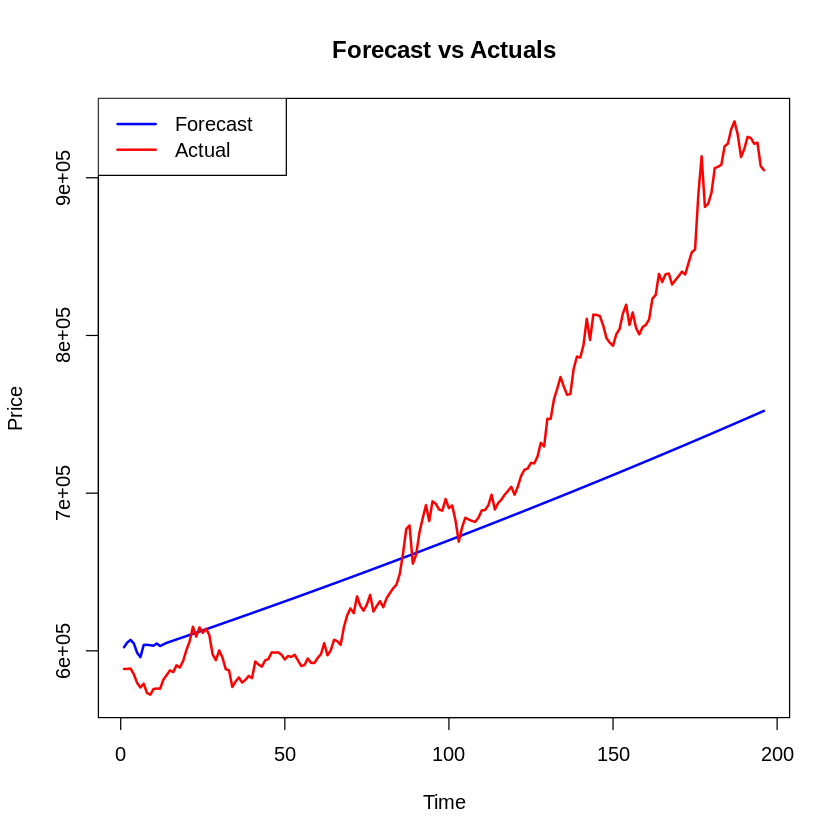


	Ljung-Box test

data:  Residuals from ARIMA(0,1,2)(0,0,1)[12] with drift
Q* = 29.226, df = 21, p-value = 0.1087

Model df: 3.   Total lags used: 24




	Box-Ljung test

data:  residuals(myfit)
X-squared = 0.0083251, df = 1, p-value = 0.9273


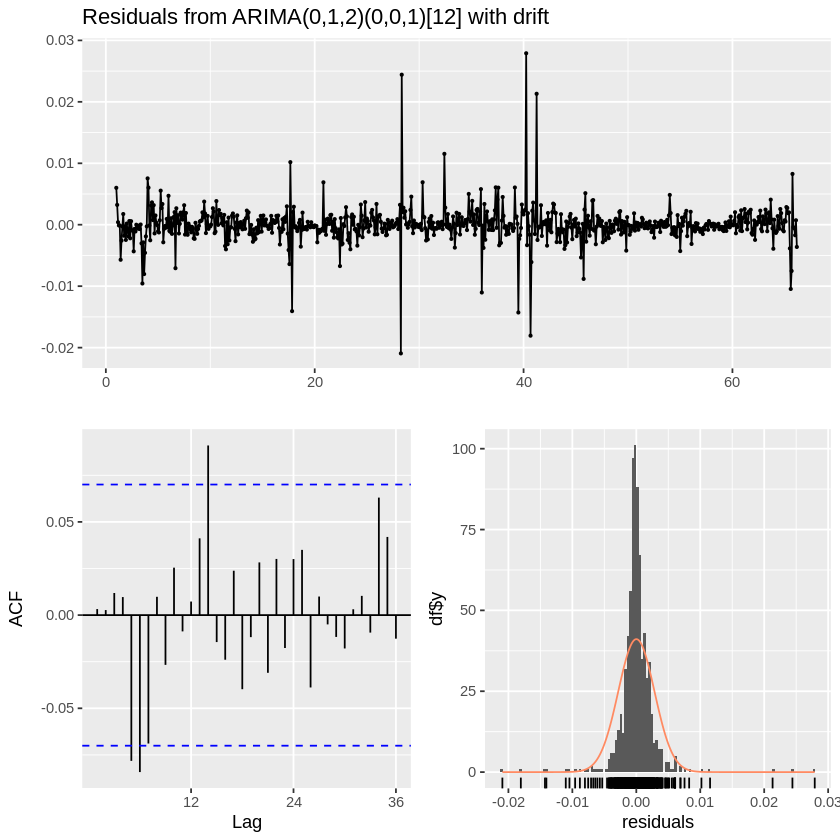

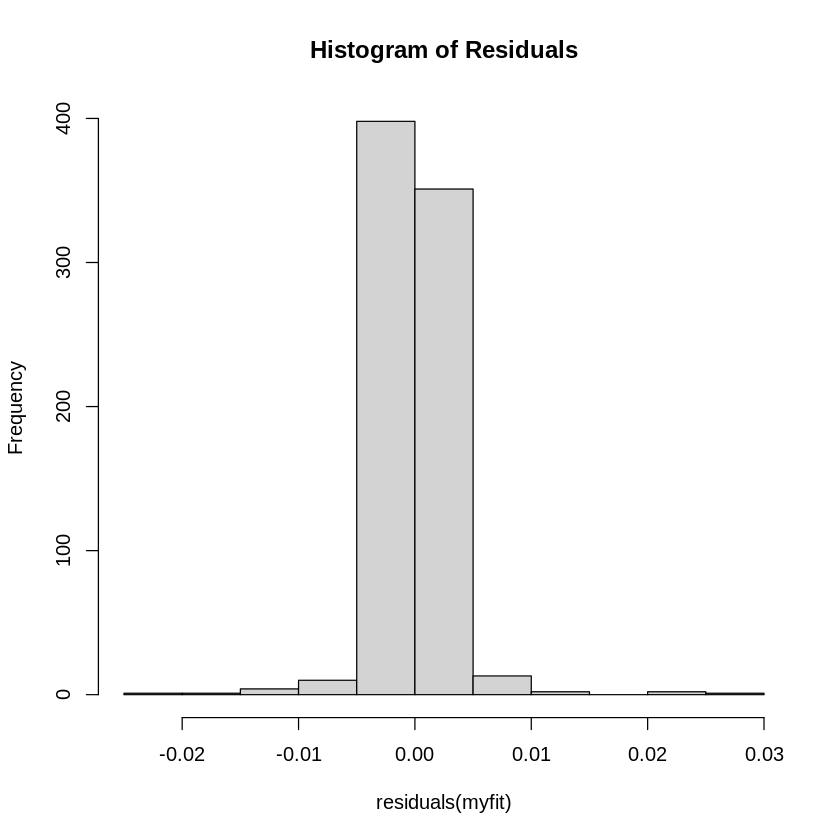

[1] "RMSE: 0.00283153361435371"
[1] "MAE: 0.00153254192046182"
[1] "AIC: -6949.71624897182"
[1] "BIC: -6926.40697526909"


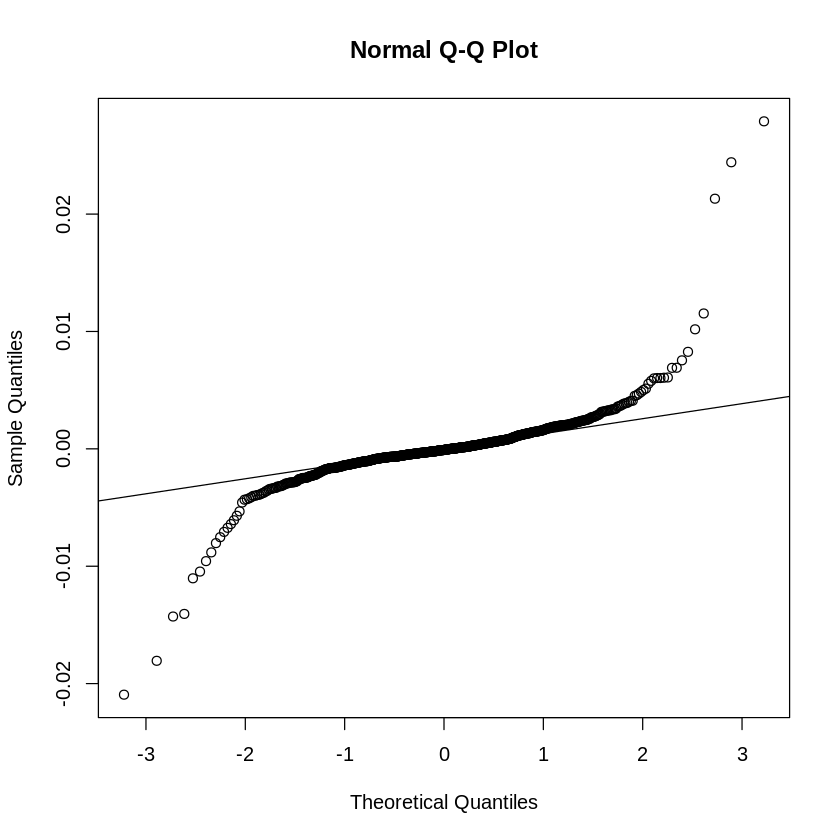

In [7]:
# Read data
mydata <- read.csv('Data.csv')

# Extract the first column (assuming it contains the time series data)
sales_data <- mydata[[1]]

# Define the horizon and seasonal length
H <- 5  # Horizon
L <- 12  # Length of Season

# Set the train-test split ratio (e.g., 80% for training, 20% for testing)
train_ratio <- 0.8

# Determine the index to split the data
train_size <- floor(train_ratio * length(sales_data))

# Split the data into training and test sets
train_data <- sales_data[1:train_size]
test_data <- sales_data[(train_size + 1):length(sales_data)]

# Create a time series object for the training set
train_ts <- ts(train_data, frequency = L)

# Fit the ARIMA model on the training data
myfit <- auto.arima(train_ts, seasonal = TRUE, trace = FALSE, stepwise = TRUE, approximation = TRUE, lambda = 'auto', max.order = 20)

# Forecast the future values for the test period
myforecast <- forecast(myfit, h = length(test_data))

# Inverse the Box-Cox transformation using the lambda from the model
lambda <- myfit$lambda
forecast_values <- myforecast$mean
forecast_values <- as.numeric(forecast_values)

# Determine the range of y-axis limits
y_min <- min(min(forecast_values), min(test_data))
y_max <- max(max(forecast_values), max(test_data))

# Plot the forecast against actual test data with adjusted y-axis limits
plot(forecast_values, type = "l", col = "blue", lwd = 2, ylab = "Price", xlab = "Time",
     main = "Forecast vs Actuals", ylim = c(y_min, y_max))
lines(test_data, col = "red", lwd = 2)
legend("topleft", legend = c("Forecast", "Actual"), col = c("blue", "red"), lwd = 2)

# Calculate RMSE and MAE on the original scale for the test set
rmse_value <- rmse(test_data, myforecast$mean)
mae_value <- mae(test_data, myforecast$mean)
mape_value <- mean(abs((test_data - myforecast$mean) / test_data)) * 100

# Print RMSE, MAE, and MAPE
print(paste("RMSE on test data:", rmse_value))
print(paste("MAE on test data:", mae_value))
print(paste("MAPE:", mape_value))

# Optionally, plot the residuals of the model on the training data
checkresiduals(myfit)
Box.test(residuals(myfit), type = "Ljung-Box")
hist(residuals(myfit), main="Histogram of Residuals")
qqnorm(residuals(myfit))
qqline(residuals(myfit))
rmse <- sqrt(mean(residuals(myfit)^2))
mae <- mean(abs(residuals(myfit)))
print(paste("RMSE:", rmse))
print(paste("MAE:", mae))

print(paste("AIC:", AIC(myfit)))
print(paste("BIC:", BIC(myfit)))